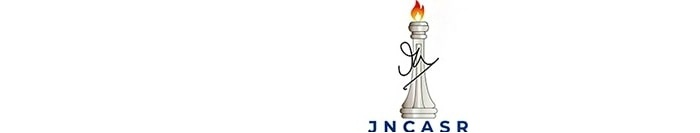

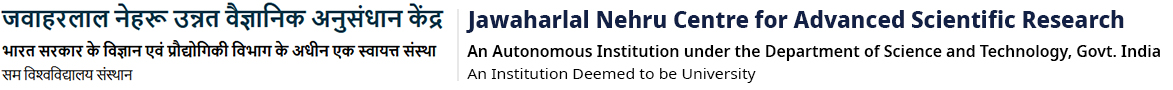 
# **Summer Internship Project 2025** 
## Intern : [Tejas Sangale](https://www.linkedin.com/in/tejas-sangale/) (BTech. Student at Manipal Institute of Technology)
## Guide : [Dr. Anand Krishnan](https://www.jncasr.ac.in/faculty/anandk) (Prof. at ECEB Lab - JNCASR)

###  Program to reduce the noise for better visualisation of acoustic notes.

#### 1.1) Creating a code to generate a Spectrogram from raw data.

-  We know that Sound Spectrogram = FFT(Waveform)

-  Using RavenPro we analysed the Raw data required for creating the Spectrogram and plotted the same using 'librosa.display' function.

-  We extracted the data using bird isolation experiment where an affiliative pair of birds were kept in a safe ventilated comfortable evironment away from the   colony.

-  We were able to record the calls using a microphone attached to the ceiling of the enclosure.

  
-  The raw data was extracted for around 2 hours and the birds were re-introduced to thier respective colony.

  
-  The Spectrogram shows the data extracted from the .wav file for around 2 mins.

-  The Intensity bar at the left of the Spetrogram gives the frequency intensity as a color gradient.

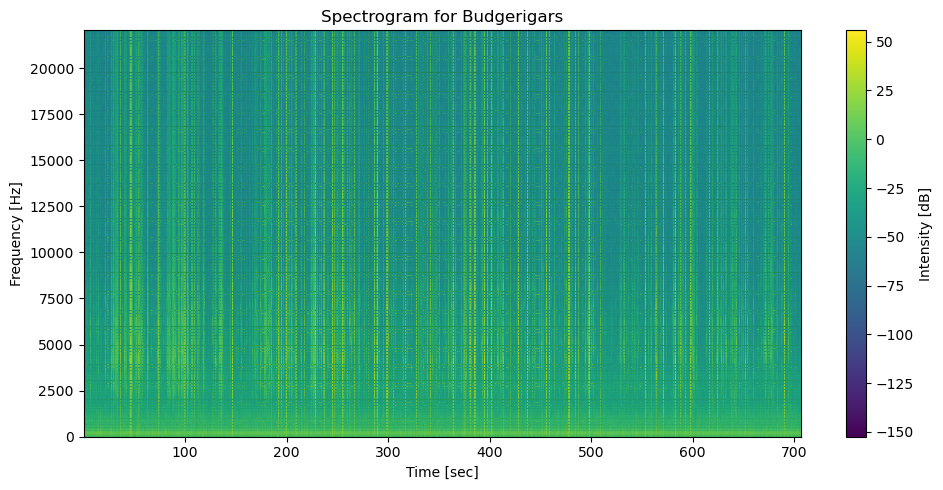

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Load .wav file
sample_rate, audio_data = wavfile.read(r"E:\Tejas\Internships\Summer_Internship_2025_JNCASR\112_119_W2_Raw_File_10mins.wav")

# If stereo, convert to mono
if len(audio_data.shape) == 2:
    audio_data = audio_data.mean(axis=1)

# Generate spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs = sample_rate)

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram for Budgerigars')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

#### 1.2) Creating a band pass filter.

-  We created a Butterworth digital and analog filter design using the 'scipy.signal' package.

-  This band pass filter was used as a mesure for selective permittivity of frequency to eliminate "noise".

-  Considering that this sample was produced by Budgerigars, we specified the sequence boundary limit as 1 seconds to start and 1 seconds to end with minimum of 3 notes in the time interval.

-  This was done to aid us identify the High Amplitude Zones and create a sequence format.

-  We measured the average amplitude for the area containing the specific note to clean the 'noise' and better visualise the note.

-  The band pass frequencies were set to a range of 1500 Hz to 2000 Hz.


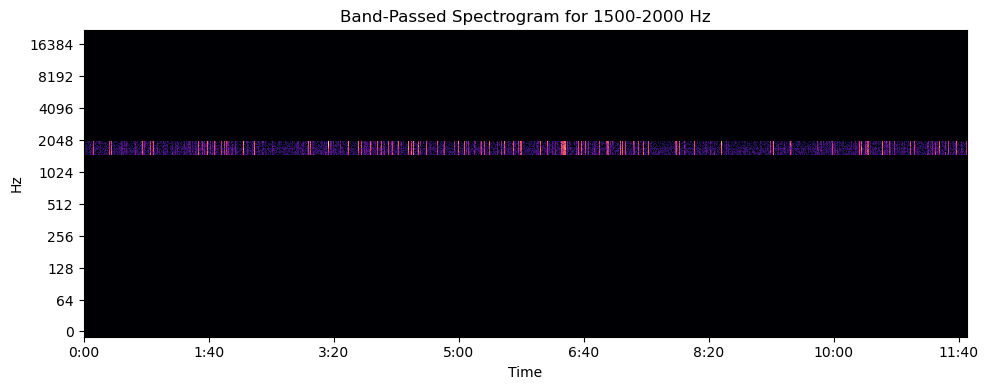

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio (optional if you already have a spectrogram)
y, sr = librosa.load(r"E:\Tejas\Internships\Summer_Internship_2025_JNCASR\112_119_W2_Raw_File_10mins.wav", sr=None)

# Create a spectrogram
S = np.abs(librosa.stft(y))

# Get frequency values for each row in the spectrogram
frequencies = librosa.fft_frequencies(sr=sr)

# Define band-pass range
low_cut = 1500    # Hz
high_cut = 2000  # Hz

# Create a mask for frequencies within the band
band_pass_mask = (frequencies >= low_cut) & (frequencies <= high_cut)

# Apply the mask: set outside frequencies to 0
S_filtered = np.copy(S)
S_filtered[~band_pass_mask, :] = 0

# Optionally invert back to time-domain
y_filtered = librosa.istft(S_filtered)

# Plot the filtered spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_filtered, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Band-Passed Spectrogram for 1500-2000 Hz')
#plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

#### 1.3) Creating a note threshold.


-  We take the amplitude average to better analyse the acoustic patterns.

-  This process helps us better distinguish between the note (signal) and the background noise by the application of a threshold.

-  The final output visualises the result with a threshold overlay.

Average amplitude of note region: 0.0313
Average amplitude of background: 0.0003


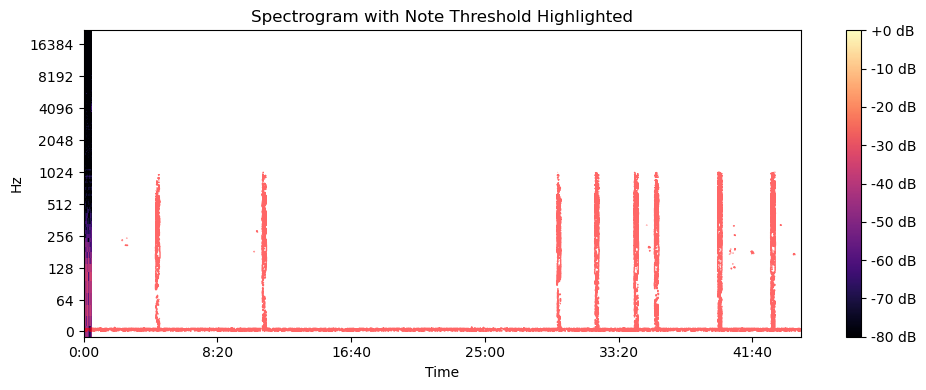

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
y, sr = librosa.load(r"E:\Tejas\Internships\Summer_Internship_2025_JNCASR\Audio_files\Working Audio Files\112_119_W2_Raw_File_30s.wav", sr=None)

# Compute magnitude spectrogram
S = np.abs(librosa.stft(y))

# Convert to decibels
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Threshold to separate note from background
threshold_db = -40  # Everything above this is considered part of the "note"
note_mask = S_db > threshold_db

# Compute mean amplitude (in linear scale) of note and background areas
S_linear = librosa.db_to_amplitude(S_db)

note_amplitude_avg = S_linear[note_mask].mean()
background_amplitude_avg = S_linear[~note_mask].mean()

# Display results
print(f"Average amplitude of note region: {note_amplitude_avg:.4f}")
print(f"Average amplitude of background: {background_amplitude_avg:.4f}")

# Optional: visualize
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Note Threshold Highlighted')

# Overlay threshold contour
plt.contour(note_mask, levels=[0.5], colors='red', linewidths=1, alpha=0.6)
plt.tight_layout()
plt.show()

#### 1.4) Mapping the function for a threshold amplitude. 

-  We have applied used a smooth amplitude mapping method to simulate a threshold using a logistic function.

-  This is particularly helpful in understanding how amplitudes are modified around the -40 db threshold.

-  We calculated the linear amplitude using the formula:

$$ 
\text{dB} = 20 \times \log_{10}(\text{Amplitude Ratio})
$$

-  Here the Amplitude Ratio is
$$ \text{Amplitude Ratio} = \frac{\text{Signal Amplitude}}{\text{Reference Amplitude}}$$


  
-  Hence the Amplitude Ratio comes up to be
  $$ 
\text{Amplitude Ratio} = 10^{\frac{\text{dB}}{20}}
 $$

-  Using these equations we get threshold amplitude as
$$10^{\frac{-40}{20}} = 10^{-2} = 0.01$$

-  'k' here represets the steepness of the logistic curve and helps understands the gain around the threshold amplitude.

-  k parameter controls the hardness and softness of the amplitude gate. The vakue of k can range from 0 to 100 and gives an increasing hardeness gradient. We have taken k = 20 to have a moderate threshold.

-  This is calculated using the logistic gain function formula which is
$$ \text{Gain}(A) = \frac{1}{1 + e^{-k \left( \log_{10}(A) - \log_{10}(A_{\text{thresh}}) \right)}}$$

-  We generated 1000 amplitude values between $10^{-5} = 0.00001$ and $10^{0} = 1$. This simulates real-world signal strengths.

-  Then we computed the soft gain using the Logistic gain function

$$ \text{Soft Gain}(A) = \frac{1}{1 + e^{-k \left( \log_{10}(A) - \log_{10}(A_{\text{thresh}}) \right)}} $$

-  Here Original Amplitude or A_old is the behaviour which avoids harsh cutoffs and makes a smooth transition.

-  The value of A_old depends on 3 situations:
 1. When A_old is much smaller than the threshold → gain ≈ 0.
 2. When A_old ≈ threshold → gain ≈ 0.5.
 3. When A_old is much larger → gain ≈ 1.

-  Once the formula is applied it results in a soft thresholding and a smooth gate.

-  The red dotted line is the threshold amplitude plotted on a log-log scale to show the range and transition.

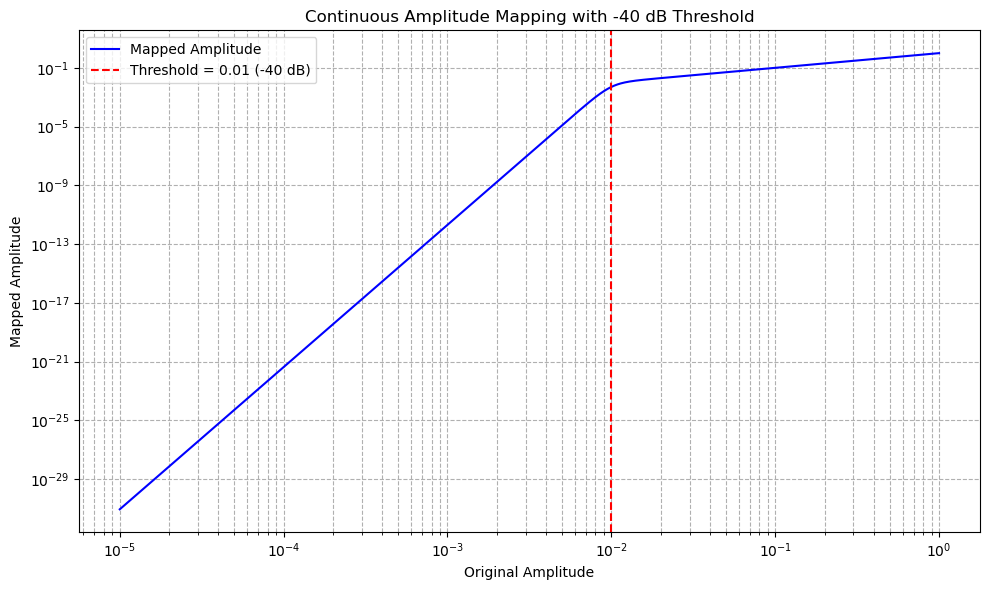

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
threshold_db = -40
threshold_amp = 10 ** (threshold_db / 20)  # 0.01
k = 20  # Steepness of logistic curve

# Generate input amplitudes (log scale)
A_old = np.logspace(-5, 0, 1000)  # from 0.00001 to 1

# Compute soft gain
log_A = np.log10(A_old)
log_thresh = np.log10(threshold_amp)
soft_gain = 1 / (1 + np.exp(-k * (log_A - log_thresh)))

# Compute new amplitude
A_new = A_old * soft_gain

# Plot
plt.figure(figsize=(10, 6))
plt.plot(A_old, A_new, color='blue', label='Mapped Amplitude')
plt.axvline(threshold_amp, color='red', linestyle='--', label='Threshold = 0.01 (-40 dB)')
plt.title("Continuous Amplitude Mapping with -40 dB Threshold")
plt.xlabel("Original Amplitude")
plt.ylabel("Mapped Amplitude")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


#### 1.5) Applying a Leaky ReLU Noise Gate.

-  We applied the leaky noise gate to supress the quite background noise without completely silencing it.

-  We converted the audio samples to float32 so that we can safely scale them.

-  Once we find the maximum possible amplitude depending on the audio's depth .i.e 16-bit or 32-bit.

-  This helps in calculating the threshold in linear amplitude.

-  We set the threshold of -20db through experimentation and analysing the cleaner acoustic patterns.

-  Then we specify the threshold amp by inserting the formula
$$ \text{threshold\_amp} = \text{max\_amp} \times 10^{\frac{-20}{20}} = 0.1 \times \text{max\_amp}$$

-  The leak factor is set in as 0.01 so that quiet signals aren't muted completely but rather reduced to 1% of the original value.

-  Once we have defined the functions we defined the specifications in RavenPro to help us better visualise the notes.

-  Edit the Brightness to 46 and Contrast to 60 for better identification.

-  The configuration of the Band Limited Energy Detector must be set to enhance the note specification.

-  The modifications to be made are as specified.

01. Unclick the 'Waveform 1' dialogue box and the view the spectrogram in 'Chanel 2'.
02. Under the 'view' cell select the interactive detector and open the 'Configure Band Limited Detector'.
03. Edit the Target Signal Parameters.
04. Specify the Minimum frequency to 18KHz and Maximum Frequency to 22KHz.
05. Adjust the Minimum Duration to 0.05224 s and keep the rest of the values as default.
06. Edit the Noise cell and change the Signal-to-Noise Ratio Parameters
07. Increase the Minimum Occupancy % to 80 and increase the SNR Threshold to 16 db.
08. Change the Percentile to 63 % under the Noise Power Estimation Parameters.
09. Do not change any other values and configure the specified settings.
10. The notes will now be visible and labelled in the Selection Table. 

In [ ]:
import numpy as np
from scipy.io import wavfile

# File paths
input_filename = r"E:\Tejas\Internships\Summer_Internship_2025_JNCASR\Audio_files\112_119_W2_Raw_File.wav"
output_filename = 'output_leaky_relu_gate_20db_1hr.wav'

# Read input WAV file
sample_rate, data = wavfile.read(input_filename)

# Convert to float for processing
data_float = data.astype(np.float32)

# Determine original max amplitude based on dtype
if data.dtype == np.int16:
    max_amp = 32768
elif data.dtype == np.int32:
    max_amp = 2147483648
else:
    max_amp = np.max(np.abs(data_float))  # for float formats

# Set threshold in dB and scale factor for below-threshold signals
threshold_db = -20
threshold_amp = max_amp * 10 ** (threshold_db / 20)  # ≈ 0.01 * max_amp
leak_factor = 0.01

# Apply Leaky ReLU-style noise gate
def leaky_gate(x):
    
    abs_x = np.abs(x)
    return np.where(abs_x < threshold_amp, x * leak_factor, x)

# If stereo or multi-channel, apply element-wise
processed = leaky_gate(data_float)

# Convert back to original data type
if data.dtype == np.int16:
    processed = np.clip(processed, -32768, 32767).astype(np.int16)
elif data.dtype == np.int32:
    processed = np.clip(processed, -2147483648, 2147483647).astype(np.int32)
else:
    processed = processed.astype(data.dtype)

# Write output WAV file
wavfile.write(output_filename, sample_rate, processed)

print(f"Leaky noise gate applied. Output saved to: {output_filename}")


-  Spectrogram before applying the Leaky ReLU gate.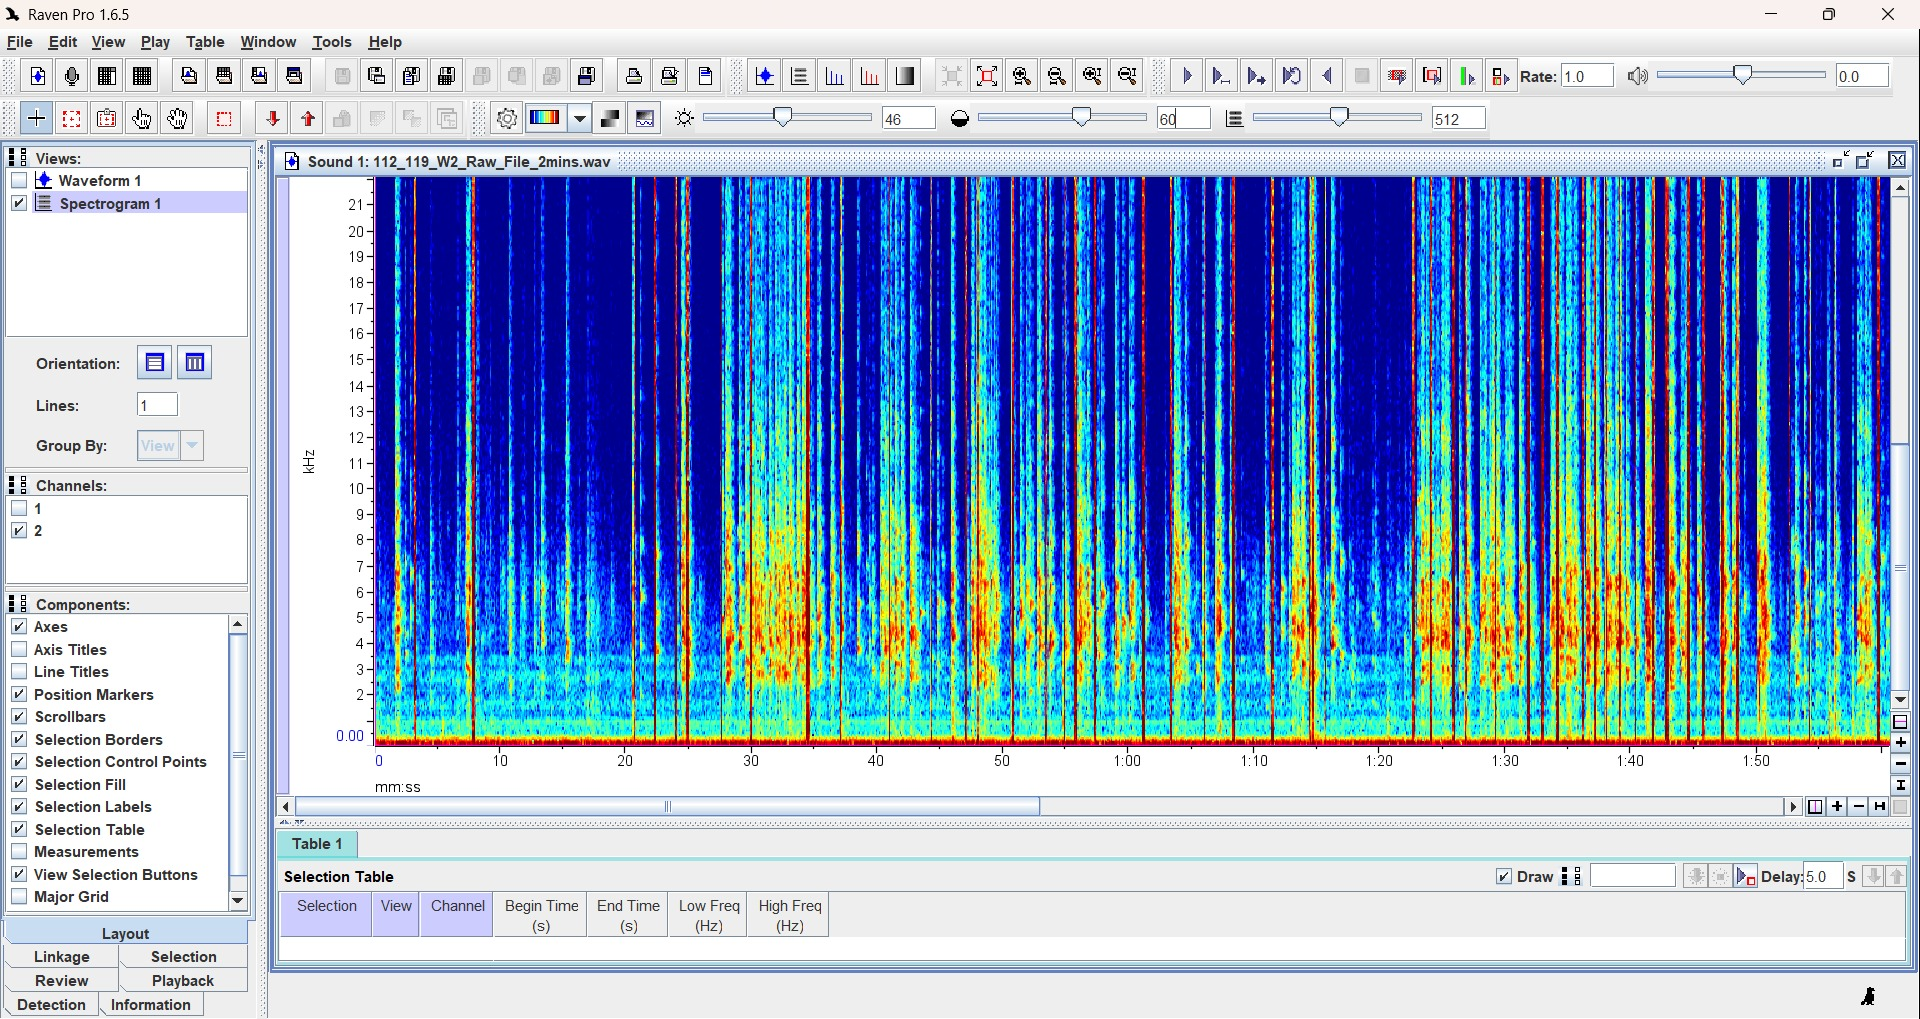

-  Spectrogram after applying the Leaky ReLU gate with the specifications in RavenPro. 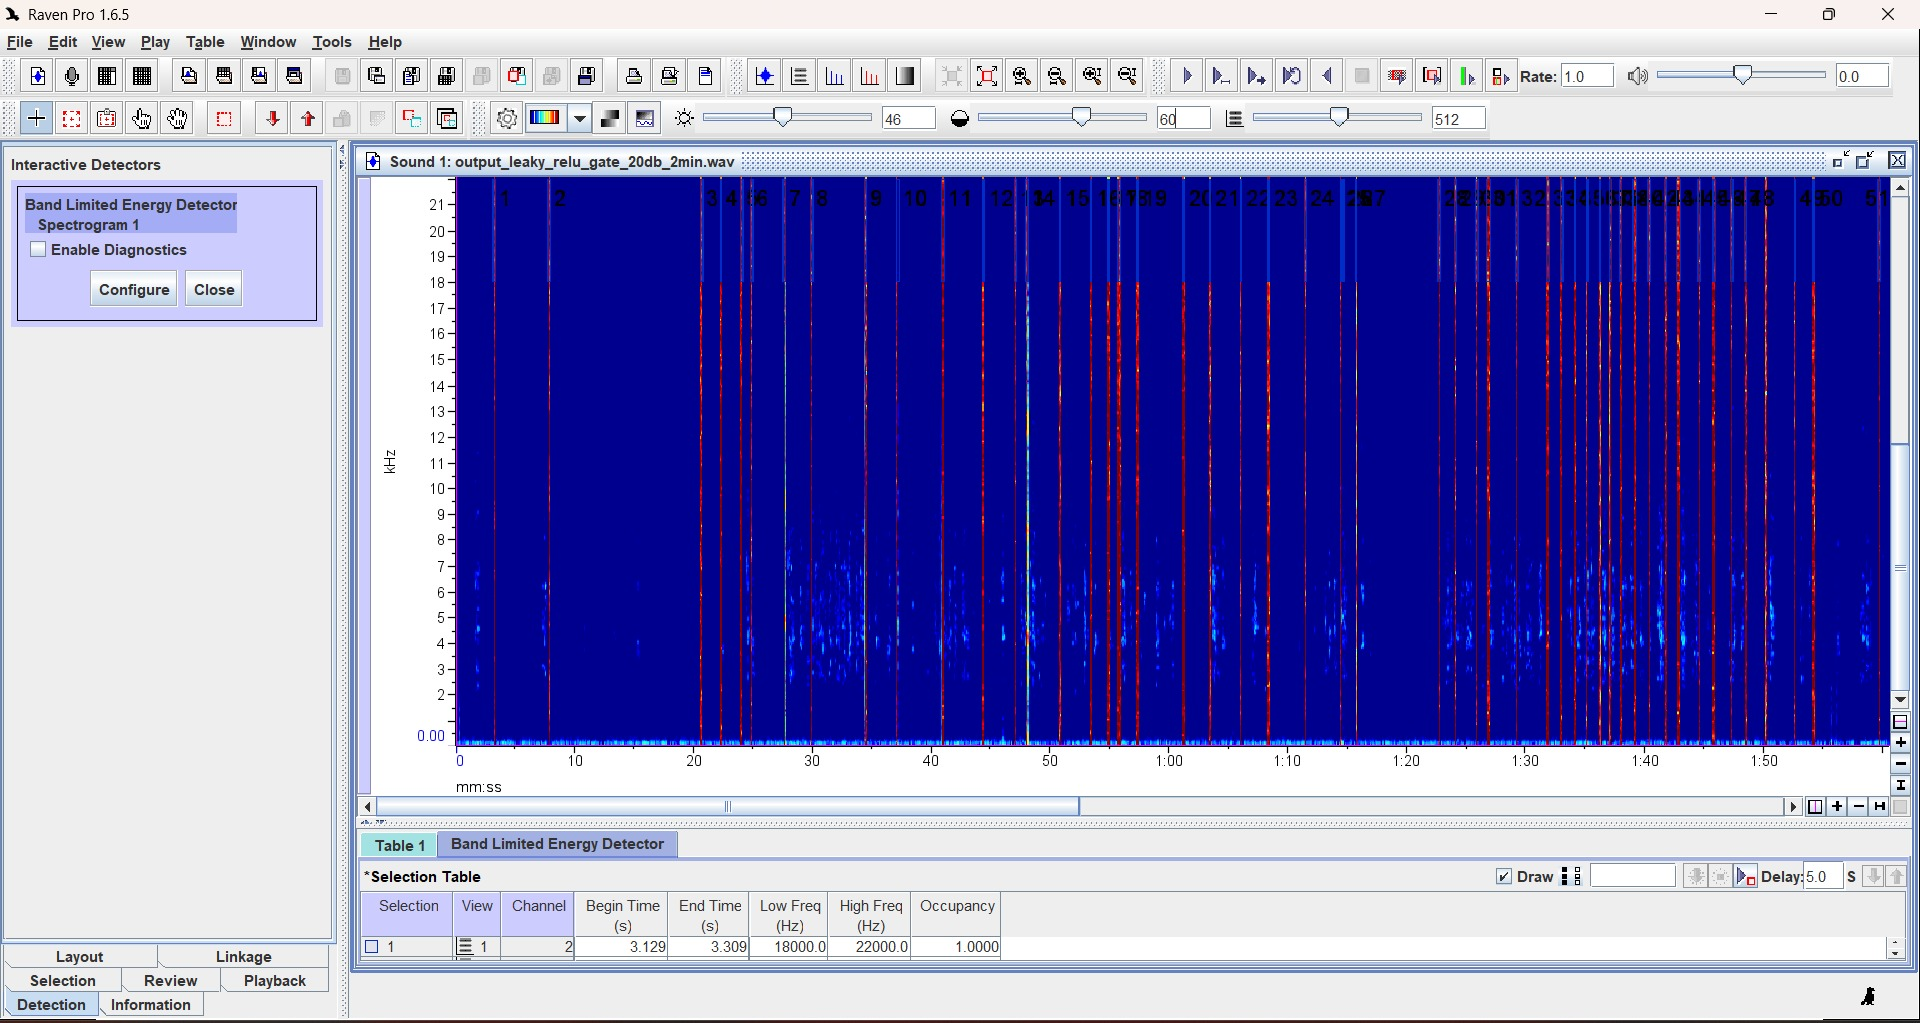

-  We are able to generate a 'Selection Table' with all the notes labelled and specified.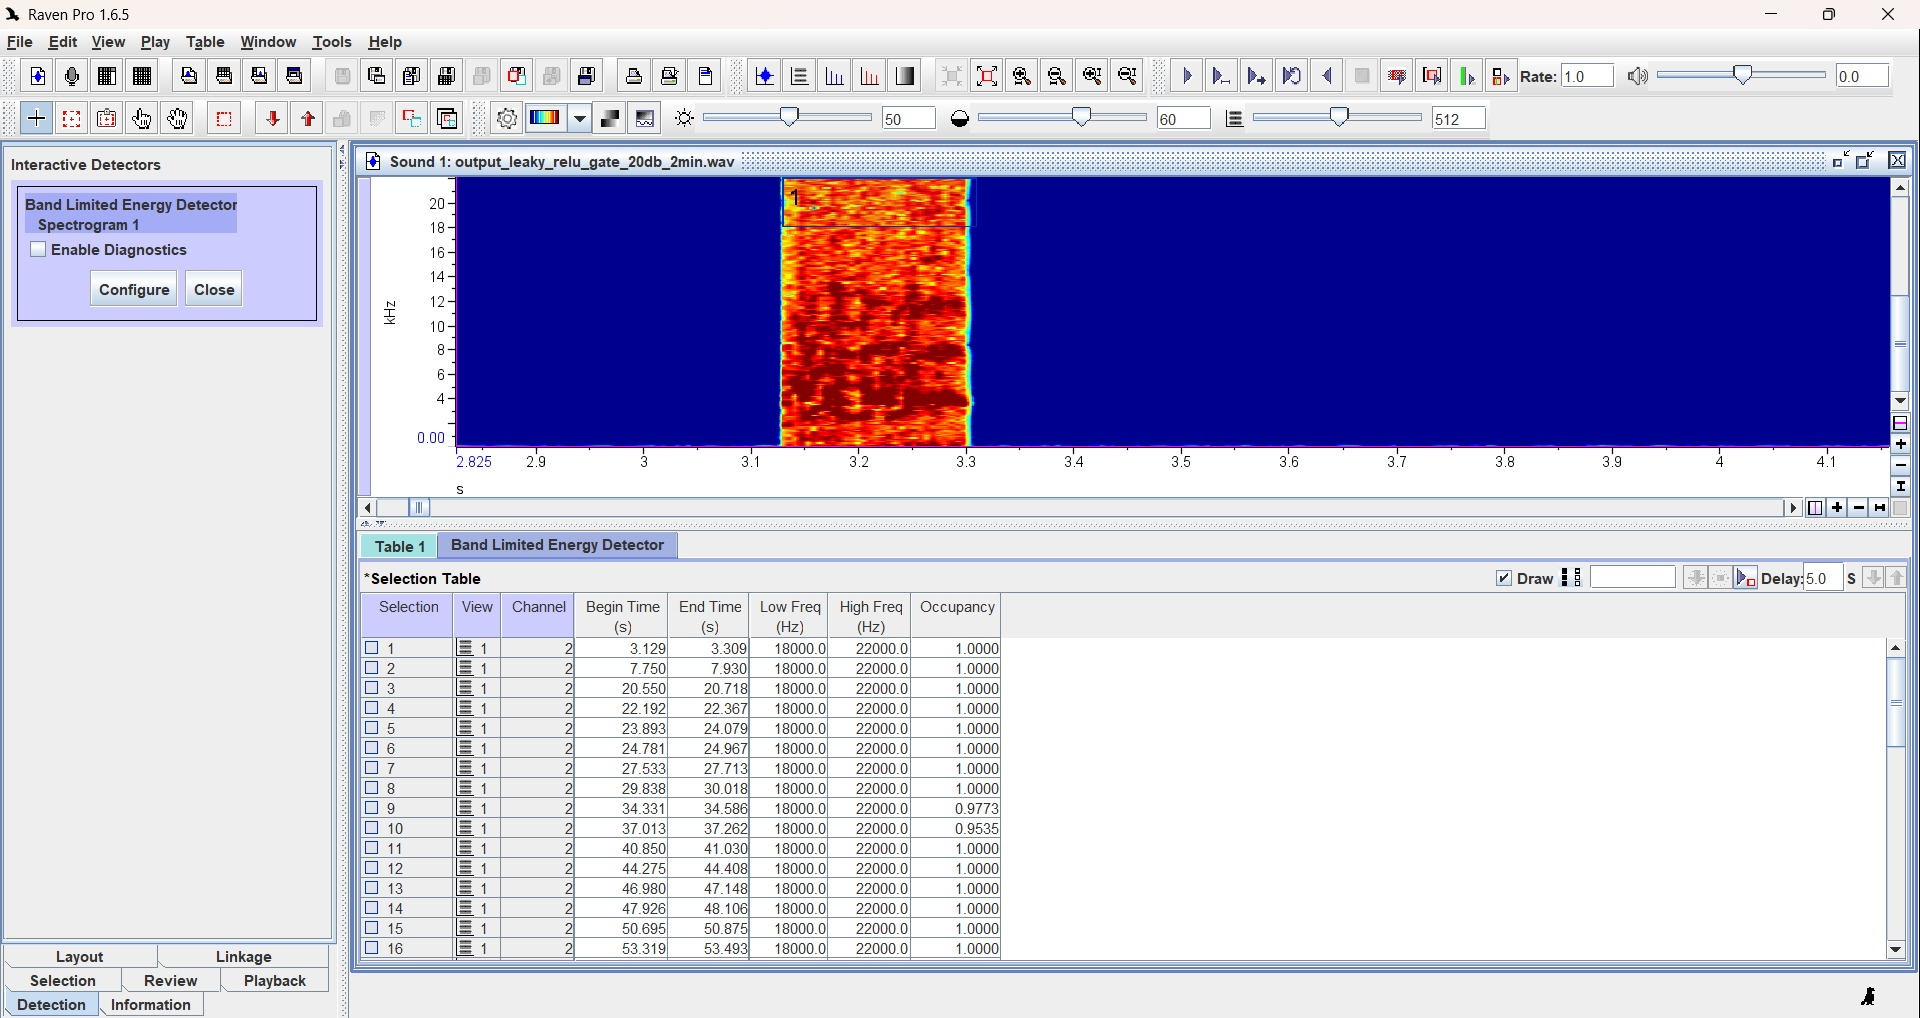
